# Importação de Bibliotecas
Importação das bibliotecas necessárias: `pandas` para análise de dados e `matplotlib.pyplot` para visualização de gráficos.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Leitura dos Dados
Carregamento do dataset da Google Play Store em um DataFrame.

In [2]:
url = 'googleplaystore.csv'
df = pd.read_csv(url)

# Informações do DataFrame
Visualização da estrutura do DataFrame: tipos de dados.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# Visualização Inicial
Visualização das primeiras linhas do DataFrame para ter uma noção dos dados.

In [4]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# Remoção de Duplicados
Remoção de aplicativos duplicados, mantendo apenas a primeira ocorrência.

In [5]:
df.drop_duplicates(subset='App', keep='first', inplace=True)

# Verificação de Inconsistências
Identificação de registros com valores inconsistentes.

In [6]:
df[df['Reviews'] == '3.0M']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


# Remoção de Registro Inválido
Remoção do registro identificado como inconsistente anteriormente.

In [7]:
df.drop(10472, inplace=True)

# Conversão de Tipos
Conversão da coluna 'Reviews' para o tipo inteiro.

In [8]:
df['Reviews'] = df['Reviews'].astype(int)

# Limpeza e Conversão da Coluna 'Installs'
Remoção de caracteres e conversão para inteiro.

In [9]:
df['Installs'] = df['Installs'].str.replace(',','').str.replace('+','').astype(int)

# Limpeza e Conversão da Coluna 'Price'
Remoção do símbolo do cifrao e conversão para float.

In [10]:
df['Price'] = df['Price'].str.replace('$','').astype(float)

# Conversão de Datas
Conversão da coluna 'Last Updated' para o formato de data.

In [11]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'], format='%B %d, %Y')

# Normalização de Colunas Textuais
Nesta etapa, normalizei todas as colunas do tipo texto (object):
- Remoção de espaços em branco.
- Conversão de textos para formato título (primeira letra maiúscula).
- Exceção: coluna `App`.

In [12]:

for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip()
    if col != 'App':
        df[col] = df[col].str.lower().str.title()
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,Art_And_Design,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 And Up
1,Coloring book moana,Art_And_Design,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 And Up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art_And_Design,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 And Up
3,Sketch - Draw & Paint,Art_And_Design,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies With Device,4.2 And Up
4,Pixel Draw - Number Art Coloring Book,Art_And_Design,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 And Up


# 2 - Faça um grafico de barras contendo os top 5 apps por número de instalação

Criação de um DataFrame com os 5 aplicativos mais instalados.

In [13]:
top_apps_por_instalacao = df[['App','Installs']].sort_values('Installs', ascending=False).head(5)

Cria um gráfico de barras verticais (bar) para exibir os top 5 Apps por Instalações

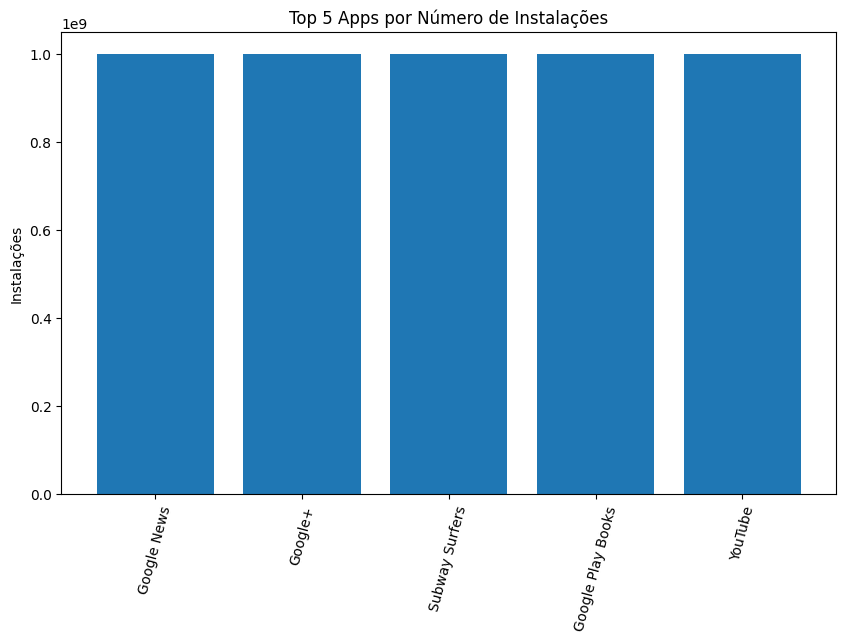

In [14]:
plt.figure(figsize=(10,6))
plt.bar(top_apps_por_instalacao['App'], top_apps_por_instalacao['Installs'])
plt.xticks(rotation=75)
plt.title('Top 5 Apps por Número de Instalações')
plt.ylabel('Instalações')
plt.show()

# 3 - Faça um grafico de pizza mostrando as categorias de apps existentes no dataset de acordo com a frequencia em que elas aparecem

 Agrupamento de Categorias

- Conta quantas vezes cada categoria aparece
- Calcula o percentual (proporção) de cada categoria em relação ao total de categorias
- Agrupa categorias com menos de 3% no grupo “Outros”.

In [15]:
categorias_existentes = df['Category'].value_counts()
percentuais = categorias_existentes / categorias_existentes.sum()
categorias_maiores = percentuais[percentuais >= 0.03]
outros = percentuais[percentuais < 0.03].sum()
categorias_final = categorias_maiores.copy()
categorias_final['Outros'] = outros

Gráfico: Distribuição das Categorias,
Visualização em gráfico de pizza da distribuição das categorias de aplicativos.


Cria um gráfico de pizza (pie chart) para representar visualmente a distribuição das categorias:
 - Cada fatia representa uma categoria.
 - Percentuais são exibidos diretamente nas fatias
 - Adiciona uma anotação no gráfico indicando quantas categorias pequenas foram agrupadas no "Outros".

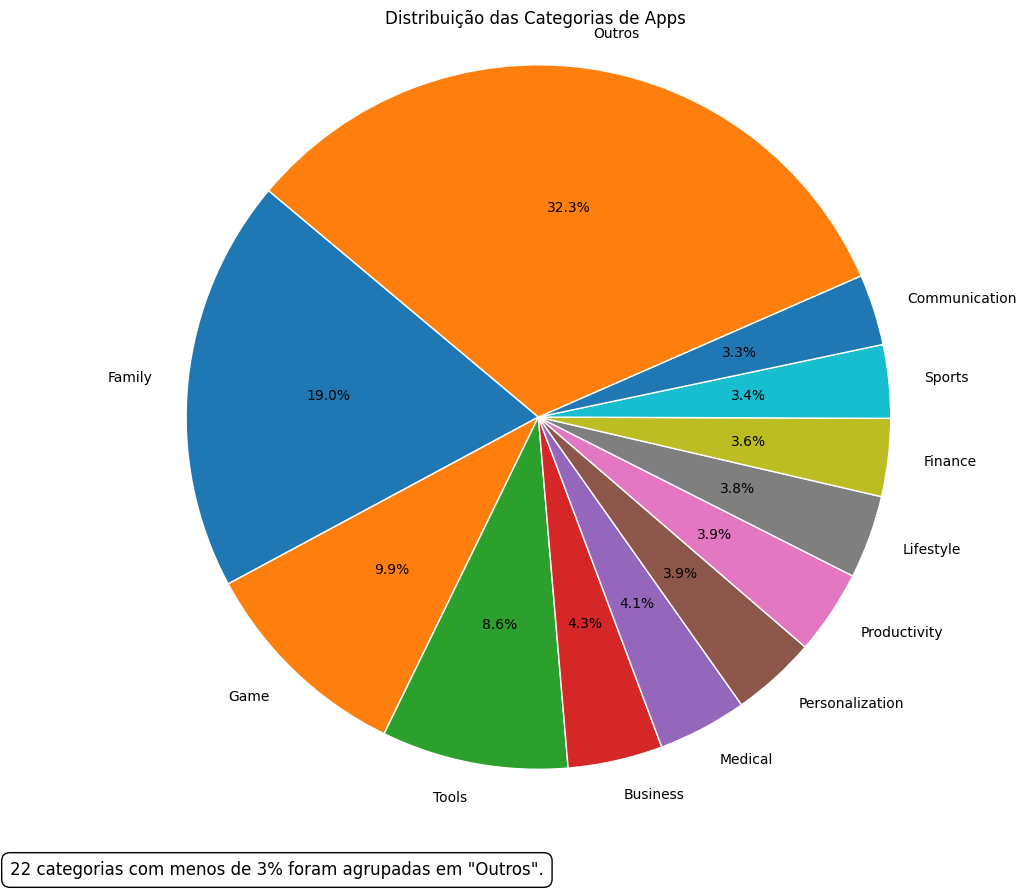

In [16]:
num_categorias_agrupadas = (percentuais < 0.03).sum()

plt.figure(figsize=(10,10))
plt.pie(categorias_final, labels=categorias_final.index, autopct='%1.1f%%', startangle=140,wedgeprops=dict(edgecolor='white', linewidth=1))
plt.title('Distribuição das Categorias de Apps ')
plt.text(-1.5, -1.3, f'{num_categorias_agrupadas} categorias com menos de 3% foram agrupadas em "Outros".',
         fontsize=12, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.axis('equal')
plt.show()

# 4 - Mostre qual o app mais caro existente no dataset

Aplicativo Mais Caro,
Identificação do aplicativo com o maior preço na Play Store.
- Ordena os apps por preço em ordem decrescente.
- Exibe o nome e valor do app mais caro.

In [17]:
app_mais_caro = df[['App', 'Price']].sort_values(by='Price', ascending=False).iloc[0]
print(f"O app mais caro é '{app_mais_caro['App']}' custando ${app_mais_caro['Price']}")

O app mais caro é 'I'm Rich - Trump Edition' custando $400.0


# 5 - Mostre quantos apps são classificados como 'Mature 17+'

Aplicativos 'Mature 17+',
Contagem de quantos aplicativos são classificados como 'Mature 17+'.
- Filtra os apps com classificação etária 17+.
- Mostra o total.

In [18]:
mature_apps = df[df['Content Rating'] == 'Mature 17+']
print(f"Existem {mature_apps.shape[0]} apps classificados como 'Mature 17+'")

Existem 393 apps classificados como 'Mature 17+'


# 6 - Mostre o top 10 apps por número de reviews bem como o respectivo numero de reviews. Ordene a lista de forma decrescente por número de reviews

Top 10 Apps por Reviews,
Exibição dos 10 aplicativos com maior número de avaliações.
- Ordena os apps com mais avaliações.
- Exibe os 10 principais com número de reviews.

In [19]:
top_10_apps_reviews = df.loc[:,['Reviews','App']].sort_values(by='Reviews', ascending=False).head(10).reset_index(drop=True)
print("Top 10 Apps por Número de Reviews:")
print(top_10_apps_reviews)

Top 10 Apps por Número de Reviews:
    Reviews                                                App
0  78158306                                           Facebook
1  69119316                                 WhatsApp Messenger
2  66577313                                          Instagram
3  56642847           Messenger – Text and Video Chat for Free
4  44891723                                     Clash of Clans
5  42916526            Clean Master- Space Cleaner & Antivirus
6  27722264                                     Subway Surfers
7  25655305                                            YouTube
8  24900999  Security Master - Antivirus, VPN, AppLock, Boo...
9  23133508                                       Clash Royale


# 7 - Crie pelo menos mais 2 calculos sobre o dataset e apresente um em formato de lista e outro em formato de valor

# Tempo Médio Desde a Última Atualização

- Identifica a atualização mais recente registrada no dataset.
- Para cada aplicativo, calcula quantos dias se passaram desde a data mais recente até sua própria última atualização.
- Obtém o tempo médio (em dias) desde a última atualização considerando todos os aplicativos.

In [20]:
tempo_medio_atualizacao = (df['Last Updated'].max() - df['Last Updated']).mean()
print(f'Tempo médio desde a última atualização: {tempo_medio_atualizacao.days} dias')

Tempo médio desde a última atualização: 281 dias


# Tempo Médio de atualização por Categoria
Cálculo do tempo médio de dias desde a última atualização por categoria de app.

- Identifica a atualização mais recente registrada no dataset.
- Para cada aplicativo, calcula quantos dias se passaram desde a data mais recente até sua própria última atualização.
- Cria nova coluna com dias desde a última atualização
- Agrupa por categoria e calcula a média de tempo desde atualização.

In [21]:
df['Dias_desde_atualizacao'] = (df['Last Updated'].max() - df['Last Updated']).dt.days
tempo_medio_categoria = df.groupby('Category')['Dias_desde_atualizacao'].mean().sort_values(ascending=False)

print(tempo_medio_categoria.head(10))

Category
Libraries_And_Demo     441.261905
Personalization        428.816489
Books_And_Reference    423.788288
Tools                  349.185006
Family                 334.416485
Game                   324.004171
Video_Players          311.392638
Lifestyle              302.791328
Productivity           302.050802
Business               299.980952
Name: Dias_desde_atualizacao, dtype: float64


# Receita Potencial por Categoria
Cálculo da receita potencial das categorias com apps pagos.
- Cria coluna de receita: preço * instalações.
- Agrupa por categoria e soma a receita dos apps pagos.

In [22]:
df['Receita'] = df['Price'] * df['Installs']
receita_categoria = df[df['Type'] == 'Paid'].groupby('Category')['Receita'].sum().sort_values(ascending=False).head(10)

print("Top 10 Categorias com Maior Receita Potencial:")
print(receita_categoria)

Top 10 Categorias com Maior Receita Potencial:
Category
Family             1.136798e+08
Lifestyle          5.758394e+07
Game               4.068864e+07
Finance            2.572668e+07
Photography        8.547768e+06
Personalization    6.796948e+06
Medical            5.957536e+06
Tools              5.464821e+06
Sports             4.706212e+06
Productivity       4.313375e+06
Name: Receita, dtype: float64


# 8 - Crie pelo menos outras 2 formas graficas de exibição dos indicadores acima utilizando a biblioteca matplotlib

# Gráfico: Tempo Médio de Atualização por Categoria
Visualização do tempo médio de atualização por categoria em gráfico de linha.

- Organiza as categorias em ordem decrescente de tempo médio desde a última atualização.
- Cria um gráfico de linha onde:
  - O eixo X representa as categorias,
  - O eixo Y representa a média de dias sem atualização.
- Inclui grade horizontal para facilitar a leitura dos valores.

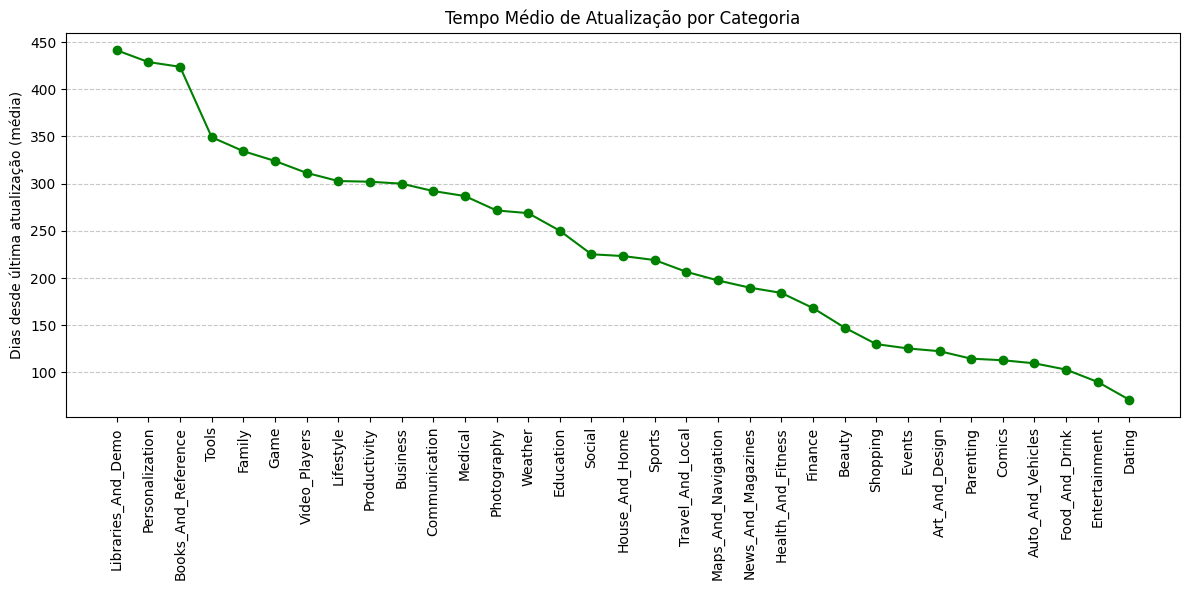

In [23]:
plt.figure(figsize=(12, 6))
tempo_medio_categoria_sorted = tempo_medio_categoria.sort_values(ascending=False)

plt.plot(tempo_medio_categoria_sorted.index, tempo_medio_categoria_sorted.values, marker='o', color='green')
plt.xticks(rotation=90)
plt.ylabel('Dias desde última atualização (média)')
plt.title('Tempo Médio de Atualização por Categoria')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Receita Potencial por Categoria
Cálculo da receita potencial das categorias com apps pagos.

- Converte os valores de receita para milhões de dólares para facilitar a leitura.
- Cria um gráfico de barras horizontais (barh) para visualizar as categorias com maior receita.
- Define os eixos:
  - Eixo X: Receita potencial (em milhões de dólares),
  - Eixo Y: Nome das categorias.
- Inverte a ordem do eixo Y (invert_yaxis()) para que a maior receita fique no topo do gráfico.
- Ajusta manualmente os ticks do eixo X para mostrar os valores em milhões, como 1.0M, 2.0M, etc.
- Adiciona uma grade horizontal no fundo para melhor leitura dos valores.

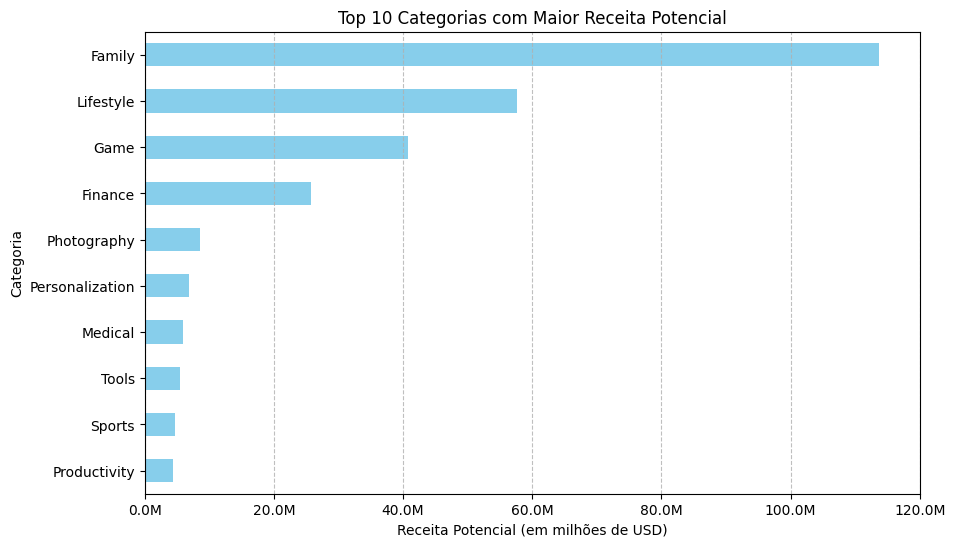

In [24]:
receita_categoria_milhoes = receita_categoria / 1000000

plt.figure(figsize=(10, 6))
receita_categoria_milhoes.plot(kind='barh', color='skyblue')
plt.xlabel('Receita Potencial (em milhões de USD)')
plt.ylabel('Categoria')
plt.title('Top 10 Categorias com Maior Receita Potencial')
plt.gca().invert_yaxis()


ticks = [round(x, 1) for x in plt.xticks()[0]]
plt.xticks(ticks, [f'{t}M' for t in ticks])

plt.grid(axis='x', linestyle='--', alpha=0.8)
plt.show()